# chin_sagging : 턱선 처짐 등급
# r_cheek_pore  : 오른쪽 볼 모공 등급
# r_cheek_pigmentation : 오른쪽 볼 색소 침착 등급
# forehead_wrinkle : 이마 주름 등급
# r_perocular_wrinkle : 오른쪽 눈가 주름
# l_cheek_pore : 왼쪽 볼 모공 등급
# glabellus_wrinkle : 미간 주름 등급
# lip_dryness  : 입술 건조도 등급
# forehead_pigmentation : 이마 색소 침착 등급
# l_cheek_pigmentation : 왼쪽 볼 색소 침착 등급
# l_perocular_wrinkle: 왼쪽 눈가 주름 등급


---


# 전문가 진단 라벨링 : 주름, 색소 침착, 모공, 입술, 턱 >> json 파일(등급 분류)
# 정밀 측정 : 수분, 탄력, 모공, 주름 >> measurement data(측정값 회귀)

>> 수분, 탄력
>>

---
# 목차
## 1. 주름과 모공의 등급 분류 파악하기


In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# matplotlib에 나눔고딕 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 기본 폰트 설정
plt.rc('font', family='NanumBarunGothic')
# 한글 테스트

In [ ]:
path = '/content/drive/MyDrive/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/annotation_data.csv'
path1 = '/content/drive/MyDrive/Final_project_2조/02_2. 전처리 및 EDA_이미지/data/measurement_data.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
label_raw = pd.read_csv(path,index_col=0)
measurement_raw = pd.read_csv(path1, index_col=0)

In [ ]:
label = label_raw.copy()
measurement = measurement_raw.copy()

In [ ]:
label[100:150]

,ID,location,acne,chin_sagging,r_cheek_pore,r_cheek_pigmentation,forehead_wrinkle,r_perocular_wrinkle,l_cheek_pore,glabellus_wrinkle,lip_dryness,forehead_pigmentation,l_cheek_pigmentation,l_perocular_wrinkle
88,37,L,NaN,2.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,0.0,3.0,3.0
87,37,F,NaN,2.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,0.0,3.0,3.0
90,38,F,NaN,2.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,2.0
92,38,R,NaN,2.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,2.0
91,38,L,NaN,2.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,2.0
93,39,F,NaN,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0
95,39,R,NaN,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0
94,39,L,NaN,1.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,3.0
97,40,L,NaN,2.0,3.0,3.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0
96,40,F,NaN,2.0,3.0,3.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0


In [ ]:
measurement[:5]

,ID,수분_이마,수분_오른쪽볼,수분_왼쪽볼,수분_턱,탄력_턱_R0,탄력_턱_R1,탄력_턱_R2,탄력_턱_R3,탄력_턱_R4,...,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,스팟개수_정면,모공개수_오른쪽볼,모공개수_왼쪽볼
0,1,53.00,76.33,71.67,78.67,0.204,0.083,0.5931,0.243,0.123,...,15.760,95.142,41.774,98.502,70.769,46.387,52.115,147,608,629
1,2,75.00,64.00,63.00,66.00,0.279,0.088,0.6846,0.322,0.152,...,18.147,116.790,47.082,122.940,84.142,54.029,68.907,158,691,631
2,3,55.67,59.00,58.00,57.67,0.375,0.143,0.6187,0.399,0.182,...,19.352,111.210,51.799,116.000,89.042,60.206,55.790,32,417,312
3,4,58.00,53.33,53.67,63.33,0.249,0.093,0.6265,0.285,0.149,...,21.353,116.290,54.002,126.210,93.858,61.262,64.950,291,924,897
4,6,63.67,64.00,60.67,70.33,0.199,0.097,0.5126,0.248,0.158,...,20.146,116.920,52.665,122.920,89.886,65.894,57.030,90,301,382


In [ ]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 1 to 2545
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2895 non-null   int64  
 1   location               2895 non-null   object 
 2   acne                   0 non-null      float64
 3   chin_sagging           2895 non-null   float64
 4   r_cheek_pore           2895 non-null   float64
 5   r_cheek_pigmentation   2895 non-null   float64
 6   forehead_wrinkle       2895 non-null   float64
 7   r_perocular_wrinkle    2895 non-null   float64
 8   l_cheek_pore           2895 non-null   float64
 9   glabellus_wrinkle      2895 non-null   float64
 10  lip_dryness            2895 non-null   float64
 11  forehead_pigmentation  2895 non-null   float64
 12  l_cheek_pigmentation   2895 non-null   float64
 13  l_perocular_wrinkle    2895 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 339.3+ KB


In [ ]:
measurement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1071
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1072 non-null   int64  
 1   수분_이마            1072 non-null   float64
 2   수분_오른쪽볼          1072 non-null   float64
 3   수분_왼쪽볼           1072 non-null   float64
 4   수분_턱             1072 non-null   float64
 5   탄력_턱_R0          1072 non-null   float64
 6   탄력_턱_R1          1072 non-null   float64
 7   탄력_턱_R2          1072 non-null   float64
 8   탄력_턱_R3          1072 non-null   float64
 9   탄력_턱_R4          1072 non-null   float64
 10  탄력_턱_R5          1072 non-null   float64
 11  탄력_턱_R6          1072 non-null   float64
 12  탄력_턱_R7          1072 non-null   float64
 13  탄력_턱_R8          1072 non-null   float64
 14  탄력_턱_R9          1072 non-null   float64
 15  탄력_턱_Q0          1072 non-null   float64
 16  탄력_턱_Q1          1072 non-null   float64
 17  탄력_턱_Q2          10

## 1. 주름과 모공의 등급 분류 파악하기

### 1-1 주름

In [ ]:
label.columns

Index(['ID', 'location', 'acne', 'chin_sagging', 'r_cheek_pore',
       'r_cheek_pigmentation', 'forehead_wrinkle', 'r_perocular_wrinkle',
       'l_cheek_pore', 'glabellus_wrinkle', 'lip_dryness',
       'forehead_pigmentation', 'l_cheek_pigmentation', 'l_perocular_wrinkle'],
      dtype='object')

In [ ]:
measurement.columns

Index(['ID', '수분_이마', '수분_오른쪽볼', '수분_왼쪽볼', '수분_턱', '탄력_턱_R0', '탄력_턱_R1',
       '탄력_턱_R2', '탄력_턱_R3', '탄력_턱_R4', '탄력_턱_R5', '탄력_턱_R6', '탄력_턱_R7',
       '탄력_턱_R8', '탄력_턱_R9', '탄력_턱_Q0', '탄력_턱_Q1', '탄력_턱_Q2', '탄력_턱_Q3',
       '탄력_왼쪽볼_R0', '탄력_왼쪽볼_R1', '탄력_왼쪽볼_R2', '탄력_왼쪽볼_R3', '탄력_왼쪽볼_R4',
       '탄력_왼쪽볼_R5', '탄력_왼쪽볼_R6', '탄력_왼쪽볼_R7', '탄력_왼쪽볼_R8', '탄력_왼쪽볼_R9',
       '탄력_왼쪽볼_Q0', '탄력_왼쪽볼_Q1', '탄력_왼쪽볼_Q2', '탄력_왼쪽볼_Q3', '탄력_오른쪽볼_R0',
       '탄력_오른쪽볼_R1', '탄력_오른쪽볼_R2', '탄력_오른쪽볼_R3', '탄력_오른쪽볼_R4', '탄력_오른쪽볼_R5',
       '탄력_오른쪽볼_R6', '탄력_오른쪽볼_R7', '탄력_오른쪽볼_R8', '탄력_오른쪽볼_R9', '탄력_오른쪽볼_Q0',
       '탄력_오른쪽볼_Q1', '탄력_오른쪽볼_Q2', '탄력_오른쪽볼_Q3', '탄력_이마_R0', '탄력_이마_R1',
       '탄력_이마_R2', '탄력_이마_R3', '탄력_이마_R4', '탄력_이마_R5', '탄력_이마_R6', '탄력_이마_R7',
       '탄력_이마_R8', '탄력_이마_R9', '탄력_이마_Q0', '탄력_이마_Q1', '탄력_이마_Q2', '탄력_이마_Q3',
       '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
       '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra',
       '주름_오른쪽눈가_Rq', '주름_오른쪽눈가

In [ ]:
label_wrinkle = label[['ID', 'r_perocular_wrinkle', 'l_perocular_wrinkle', 'glabellus_wrinkle', 'forehead_wrinkle']]

In [ ]:
measurement_wrinkle = measurement[['ID', '주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax', '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
                                    '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv', '주름_오른쪽눈가_Ra',
                                    '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
                                    '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]

# 오른쪽 눈가 주름

In [ ]:
label_wrinkle_r_perocular = label_wrinkle[['ID','r_perocular_wrinkle']]

In [ ]:
measurement_wrinkle_r_perocular = measurement_wrinkle[['ID','주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
                                                       '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
                                                       '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]

In [ ]:
r_perocular = pd.merge(label_wrinkle_r_perocular, measurement_wrinkle_r_perocular, on='ID')
r_perocular

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
0,1,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115
1,1,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115
2,1,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115
3,2,3.0,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907
4,2,3.0,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907
...,...,...,...,...,...,...,...,...,...,...
2890,1099,1.0,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229
2891,1099,1.0,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229
2892,1100,1.0,20.497,25.619,152.930,69.283,158.130,112.320,73.538,84.595
2893,1100,1.0,20.497,25.619,152.930,69.283,158.130,112.320,73.538,84.595


In [ ]:
# 상관계수 계산
correlation_matrix = r_perocular.corr()

correlation_matrix

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv
ID,1.000000,0.050988,0.233146,0.232590,0.219515,0.223019,0.218616,0.228233,0.202179,0.215575
r_perocular_wrinkle,0.050988,1.000000,0.485508,0.483130,0.465625,0.443911,0.461220,0.439132,0.366529,0.495509
주름_오른쪽눈가_Ra,0.233146,0.485508,1.000000,0.999031,0.955712,0.984108,0.958009,0.990624,0.908908,0.929132
주름_오른쪽눈가_Rq,0.232590,0.483130,0.999031,1.000000,0.963921,0.982603,0.966367,0.993783,0.915688,0.938017
주름_오른쪽눈가_Rmax,0.219515,0.465625,0.955712,0.963921,1.000000,0.930825,0.997418,0.964939,0.937234,0.973499
주름_오른쪽눈가_R3z,0.223019,0.443911,0.984108,0.982603,0.930825,1.000000,0.933611,0.981460,0.899545,0.896119
주름_오른쪽눈가_Rt,0.218616,0.461220,0.958009,0.966367,0.997418,0.933611,1.000000,0.968480,0.942615,0.974016
주름_오른쪽눈가_Rz=Rtm,0.228233,0.439132,0.990624,0.993783,0.964939,0.981460,0.968480,1.000000,0.926662,0.933983
주름_오른쪽눈가_Rp,0.202179,0.366529,0.908908,0.915688,0.937234,0.899545,0.942615,0.926662,1.000000,0.842504
주름_오른쪽눈가_Rv,0.215575,0.495509,0.929132,0.938017,0.973499,0.896119,0.974016,0.933983,0.842504,1.000000


주요 변수 찾기_오른쪽 눈가 주름

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax',
            '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt',
            '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']
x = r_perocular[features]

# # 데이터 정규화
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

# PCA 적용
pca = PCA(n_components=2)  # 2개의 주성분으로 변환
principal_components = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.97320162, 0.01501134])

In [ ]:
pca = PCA(n_components=2)  # 2개의 주성분으로 변환
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

In [ ]:
principalDf

,pc1,pc2
0,-124.605930,7.146764
1,-124.605930,7.146764
2,-124.605930,7.146764
3,-84.666886,11.694240
4,-84.666886,11.694240
...,...,...
2890,-134.721693,8.077827
2891,-134.721693,8.077827
2892,-18.463320,-0.503449
2893,-18.463320,-0.503449


In [ ]:
r_perocular = pd.concat([r_perocular, principalDf], axis=1)
r_perocular

,ID,r_perocular_wrinkle,주름_오른쪽눈가_Ra,주름_오른쪽눈가_Rq,주름_오른쪽눈가_Rmax,주름_오른쪽눈가_R3z,주름_오른쪽눈가_Rt,주름_오른쪽눈가_Rz=Rtm,주름_오른쪽눈가_Rp,주름_오른쪽눈가_Rv,pc1,pc2
0,1,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115,-124.605930,7.146764
1,1,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115,-124.605930,7.146764
2,1,2.0,12.560,15.760,95.142,41.774,98.502,70.769,46.387,52.115,-124.605930,7.146764
3,2,3.0,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907,-84.666886,11.694240
4,2,3.0,14.390,18.147,116.790,47.082,122.940,84.142,54.029,68.907,-84.666886,11.694240
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,1099,1.0,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229,-134.721693,8.077827
2891,1099,1.0,11.877,14.944,88.471,38.577,92.291,69.619,42.062,50.229,-134.721693,8.077827
2892,1100,1.0,20.497,25.619,152.930,69.283,158.130,112.320,73.538,84.595,-18.463320,-0.503449
2893,1100,1.0,20.497,25.619,152.930,69.283,158.130,112.320,73.538,84.595,-18.463320,-0.503449


In [ ]:
# 결과
pca_components = pca.components_
print('printcipalComponents:\n', pca_components)
# ['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq', '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm', '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']

# pc1
## '주름_오른쪽눈가_Rt''주름_오른쪽눈가_Rmax'

# pc2
## '주름_오른쪽눈가_Rv'

printcipalComponents:
 [[ 0.07267334  0.09081882  0.55369691  0.2111558   0.57410014  0.36572632
   0.22721114  0.34688884]
 [-0.08811085 -0.09673659  0.17211833 -0.40081383  0.12427016 -0.45392612
  -0.46861317  0.59288428]]


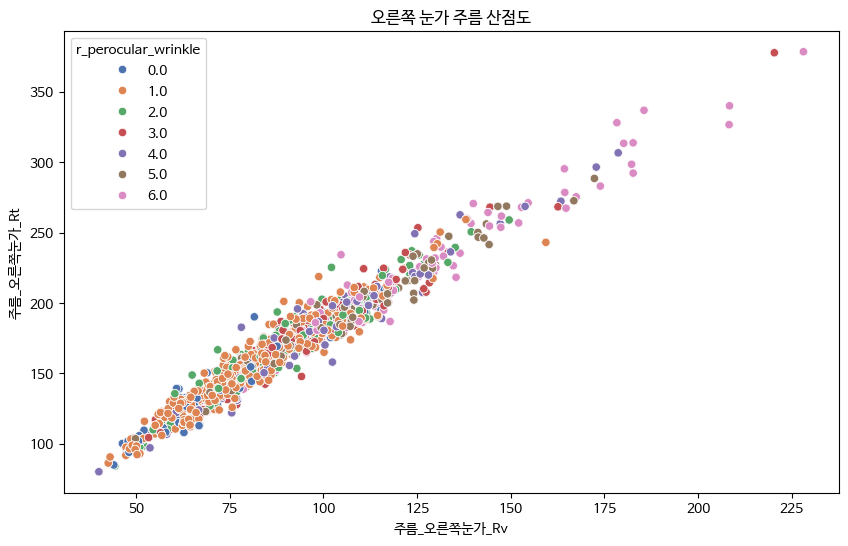

In [ ]:
# 얼굴 피부타입에 따른 군집 분석 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=r_perocular, x='주름_오른쪽눈가_Rv', y='주름_오른쪽눈가_Rt', hue='r_perocular_wrinkle', palette='deep')
plt.title('오른쪽 눈가 주름 산점도')
plt.show()

회귀분석

In [ ]:
r_perocular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2895 non-null   int64  
 1   r_perocular_wrinkle  2895 non-null   float64
 2   주름_오른쪽눈가_Ra          2895 non-null   float64
 3   주름_오른쪽눈가_Rq          2895 non-null   float64
 4   주름_오른쪽눈가_Rmax        2895 non-null   float64
 5   주름_오른쪽눈가_R3z         2895 non-null   float64
 6   주름_오른쪽눈가_Rt          2895 non-null   float64
 7   주름_오른쪽눈가_Rz=Rtm      2895 non-null   float64
 8   주름_오른쪽눈가_Rp          2895 non-null   float64
 9   주름_오른쪽눈가_Rv          2895 non-null   float64
 10  pc1                  2895 non-null   float64
 11  pc2                  2895 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 271.5 KB


In [ ]:
r_perocular.columns

Index(['ID', 'r_perocular_wrinkle', '주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq',
       '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm',
       '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv', 'pc1', 'pc2'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = r_perocular[['주름_오른쪽눈가_Ra', '주름_오른쪽눈가_Rq',
                '주름_오른쪽눈가_Rmax', '주름_오른쪽눈가_R3z', '주름_오른쪽눈가_Rt', '주름_오른쪽눈가_Rz=Rtm',
                '주름_오른쪽눈가_Rp', '주름_오른쪽눈가_Rv']]
y = r_perocular['r_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2554 - loss: 1.8731 - val_accuracy: 0.3836 - val_loss: 1.7247
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3868 - loss: 1.7205 - val_accuracy: 0.3815 - val_loss: 1.6882
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3736 - loss: 1.6865 - val_accuracy: 0.3772 - val_loss: 1.6714
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3884 - loss: 1.6477 - val_accuracy: 0.3750 - val_loss: 1.6592
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3911 - loss: 1.6339 - val_accuracy: 0.3793 - val_loss: 1.6590
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3930 - loss: 1.6059 - val_accuracy: 0.3772 - val_loss: 1.6568
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3741 - loss: 1.6256 - val_accuracy: 0.3772 - val_loss: 1.6607
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4031 - loss: 1.5938 - val_accuracy: 0.3728 - val_l

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.4075993091537133
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.45      0.89      0.59       198
         2.0       0.50      0.01      0.03        70
         3.0       0.19      0.15      0.17        82
         4.0       0.50      0.01      0.03        74
         5.0       0.26      0.15      0.19        55
         6.0       0.44      0.72      0.54        53

    accuracy                           0.41       579
   macro avg       0.33      0.28      0.22       579
weighted avg       0.37      0.41      0.30       579



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9585492227979274
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        47
         1.0       0.98      0.97      0.98       198
         2.0       0.96      0.96      0.96        70
         3.0       0.96      0.96      0.96        82
         4.0       0.92      0.96      0.94        74
         5.0       1.00      0.89      0.94        55
         6.0       0.95      1.00      0.97        53

    accuracy                           0.96       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.96      0.96      0.96       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9637305699481865
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.96      0.98      0.97       198
         2.0       0.96      0.96      0.96        70
         3.0       0.93      0.96      0.95        82
         4.0       0.96      0.96      0.96        74
         5.0       1.00      0.89      0.94        55
         6.0       1.00      1.00      1.00        53

    accuracy                           0.96       579
   macro avg       0.97      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.37305699481865284
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.39      0.96      0.55       198
         2.0       0.00      0.00      0.00        70
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        74
         5.0       0.00      0.00      0.00        55
         6.0       0.29      0.47      0.36        53

    accuracy                           0.37       579
   macro avg       0.10      0.21      0.13       579
weighted avg       0.16      0.37      0.22       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'주름_오른쪽눈가_Rmax','주름_오른쪽눈가_Rt'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = r_perocular[['주름_오른쪽눈가_Rmax','주름_오른쪽눈가_Rt']]
y = r_perocular['r_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2630 - loss: 1.9017 - val_accuracy: 0.3901 - val_loss: 1.7292
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3543 - loss: 1.7227 - val_accuracy: 0.3707 - val_loss: 1.6668
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3824 - loss: 1.6654 - val_accuracy: 0.3772 - val_loss: 1.6625
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4022 - loss: 1.6214 - val_accuracy: 0.3750 - val_loss: 1.6625
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3775 - loss: 1.6249 - val_accuracy: 0.3750 - val_loss: 1.6559
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3845 - loss: 1.6052 - val_accuracy: 0.3815 - val_loss: 1.6537
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4014 - loss: 1.5788 - val_accuracy: 0.3772 - val_loss: 1.6480
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3909 - loss: 1.5962 - val_accuracy: 0.3750 - val_lo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.3696027633851468
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.38      0.95      0.54       198
         2.0       0.00      0.00      0.00        70
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        74
         5.0       0.00      0.00      0.00        55
         6.0       0.33      0.49      0.39        53

    accuracy                           0.37       579
   macro avg       0.10      0.21      0.13       579
weighted avg       0.16      0.37      0.22       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9740932642487047
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       0.96      1.00      0.98       198
         2.0       0.96      0.96      0.96        70
         3.0       1.00      0.96      0.98        82
         4.0       1.00      0.96      0.98        74
         5.0       0.94      0.89      0.92        55
         6.0       1.00      1.00      1.00        53

    accuracy                           0.97       579
   macro avg       0.98      0.97      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9689119170984456
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.94      1.00      0.97       198
         2.0       0.96      0.96      0.96        70
         3.0       1.00      0.96      0.98        82
         4.0       0.96      0.96      0.96        74
         5.0       1.00      0.89      0.94        55
         6.0       1.00      1.00      1.00        53

    accuracy                           0.97       579
   macro avg       0.98      0.96      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.37305699481865284
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.39      0.95      0.55       198
         2.0       0.00      0.00      0.00        70
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        74
         5.0       0.00      0.00      0.00        55
         6.0       0.30      0.53      0.38        53

    accuracy                           0.37       579
   macro avg       0.10      0.21      0.13       579
weighted avg       0.16      0.37      0.22       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'주름_오른쪽눈가_Rmax','주름_오른쪽눈가_Rt','주름_오른쪽눈가_Rv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = r_perocular[['주름_오른쪽눈가_Rmax','주름_오른쪽눈가_Rt','주름_오른쪽눈가_Rv']]
y = r_perocular['r_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.3609671848013817
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.39      0.91      0.55       198
         2.0       0.00      0.00      0.00        70
         3.0       0.07      0.01      0.02        82
         4.0       0.00      0.00      0.00        74
         5.0       0.07      0.02      0.03        55
         6.0       0.30      0.51      0.38        53

    accuracy                           0.36       579
   macro avg       0.12      0.21      0.14       579
weighted avg       0.18      0.36      0.23       579



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9689119170984456
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.98      0.98      0.98       198
         2.0       0.96      0.96      0.96        70
         3.0       0.96      1.00      0.98        82
         4.0       1.00      0.96      0.98        74
         5.0       1.00      0.89      0.94        55
         6.0       0.85      1.00      0.92        53

    accuracy                           0.97       579
   macro avg       0.97      0.96      0.96       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9689119170984456
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.97      0.98      0.98       198
         2.0       0.96      0.96      0.96        70
         3.0       1.00      0.96      0.98        82
         4.0       0.96      0.96      0.96        74
         5.0       0.95      0.95      0.95        55
         6.0       0.95      1.00      0.97        53

    accuracy                           0.97       579
   macro avg       0.97      0.96      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.3747841105354059
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.39      0.96      0.55       198
         2.0       0.00      0.00      0.00        70
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        74
         5.0       0.00      0.00      0.00        55
         6.0       0.30      0.51      0.38        53

    accuracy                           0.37       579
   macro avg       0.10      0.21      0.13       579
weighted avg       0.16      0.37      0.22       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


독립변수 : pc1, pc2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = r_perocular[['pc1','pc2']]
y = r_perocular['r_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2763 - loss: 1.8697 - val_accuracy: 0.3772 - val_loss: 1.7324
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3666 - loss: 1.7406 - val_accuracy: 0.3836 - val_loss: 1.6976
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4010 - loss: 1.6735 - val_accuracy: 0.3772 - val_loss: 1.6754
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.6619 - val_accuracy: 0.3750 - val_loss: 1.6613
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3953 - loss: 1.6100 - val_accuracy: 0.3772 - val_loss: 1.6657
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3894 - loss: 1.6129 - val_accuracy: 0.3836 - val_loss: 1.6686
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3968 - loss: 1.5964 - val_accuracy: 0.3836 - val_loss: 1.6622
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4055 - loss: 1.5996 - val_accuracy: 0.3793 - val_loss: 1.6515
Epo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.36614853195164077
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.38      0.93      0.54       198
         2.0       0.00      0.00      0.00        70
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        74
         5.0       0.00      0.00      0.00        55
         6.0       0.33      0.51      0.40        53

    accuracy                           0.37       579
   macro avg       0.10      0.21      0.13       579
weighted avg       0.16      0.37      0.22       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9792746113989638
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       0.97      0.98      0.98       198
         2.0       1.00      0.96      0.98        70
         3.0       1.00      1.00      1.00        82
         4.0       0.96      0.96      0.96        74
         5.0       0.95      0.95      0.95        55
         6.0       1.00      1.00      1.00        53

    accuracy                           0.98       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.98      0.98      0.98       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9740932642487047
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       0.96      0.98      0.97       198
         2.0       1.00      0.96      0.98        70
         3.0       1.00      0.96      0.98        82
         4.0       0.96      0.96      0.96        74
         5.0       0.95      0.95      0.95        55
         6.0       1.00      1.00      1.00        53

    accuracy                           0.97       579
   macro avg       0.98      0.97      0.98       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.37132987910189985
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.39      0.94      0.55       198
         2.0       0.00      0.00      0.00        70
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        74
         5.0       0.00      0.00      0.00        55
         6.0       0.29      0.53      0.37        53

    accuracy                           0.37       579
   macro avg       0.10      0.21      0.13       579
weighted avg       0.16      0.37      0.22       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 왼쪽 눈가 주름

In [ ]:
label_wrinkle_l_perocular = label_wrinkle[['ID','l_perocular_wrinkle']]

In [ ]:
measurement_wrinkle_l_perocular = measurement_wrinkle[['ID','주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
                                                       '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
                                                       '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']]

In [ ]:
l_perocular = pd.merge(label_wrinkle_l_perocular, measurement_wrinkle_l_perocular, on='ID')
l_perocular


,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
0,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764
1,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764
2,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764
3,2,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486
4,2,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486
...,...,...,...,...,...,...,...,...,...,...
2890,1099,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410
2891,1099,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410
2892,1100,1.0,19.700,24.762,147.880,64.838,159.41,112.150,72.913,86.494
2893,1100,1.0,19.700,24.762,147.880,64.838,159.41,112.150,72.913,86.494


In [ ]:
# 상관계수 계산
correlation_matrix = l_perocular.corr()

correlation_matrix

,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv
ID,1.000000,0.049129,0.258717,0.259107,0.252607,0.247743,0.253518,0.256304,0.205663,0.268773
l_perocular_wrinkle,0.049129,1.000000,0.478211,0.473775,0.491758,0.441191,0.478161,0.432793,0.374814,0.515917
주름_왼쪽눈가_Ra,0.258717,0.478211,1.000000,0.999270,0.968453,0.986712,0.968364,0.990496,0.907901,0.942630
주름_왼쪽눈가_Rq,0.259107,0.473775,0.999270,1.000000,0.973409,0.986352,0.974218,0.993769,0.911895,0.949355
주름_왼쪽눈가_Rmax,0.252607,0.491758,0.968453,0.973409,1.000000,0.952198,0.997470,0.972926,0.933757,0.971949
주름_왼쪽눈가_R3z,0.247743,0.441191,0.986712,0.986352,0.952198,1.000000,0.953351,0.984037,0.904386,0.920764
주름_왼쪽눈가_Rt,0.253518,0.478161,0.968364,0.974218,0.997470,0.953351,1.000000,0.976236,0.939632,0.972006
주름_왼쪽눈가_Rz=Rtm,0.256304,0.432793,0.990496,0.993769,0.972926,0.984037,0.976236,1.000000,0.922602,0.945266
주름_왼쪽눈가_Rp,0.205663,0.374814,0.907901,0.911895,0.933757,0.904386,0.939632,0.922602,1.000000,0.832929
주름_왼쪽눈가_Rv,0.268773,0.515917,0.942630,0.949355,0.971949,0.920764,0.972006,0.945266,0.832929,1.000000


주름에 해당하는 중요한 변수 찾기

In [ ]:
# @title
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
            '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt',
            '주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']
x = l_perocular[features]

# 데이터 정규화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA 적용
pca = PCA(n_components=2)  # 2개의 주성분으로 변환
principal_components = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.97576006, 0.01372208])

In [ ]:
pca = PCA(n_components=2)  # 2개의 주성분으로 변환
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

In [ ]:
principalDf

,pc1,pc2
0,-84.313872,-4.682139
1,-84.313872,-4.682139
2,-84.313872,-4.682139
3,-81.234201,-4.485591
4,-81.234201,-4.485591
...,...,...
2890,-124.374917,-16.769691
2891,-124.374917,-16.769691
2892,-27.786359,-0.520701
2893,-27.786359,-0.520701


In [ ]:
l_perocular = pd.concat([l_perocular, principalDf], axis=1)
l_perocular

,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,pc1,pc2
0,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,-84.313872,-4.682139
1,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,-84.313872,-4.682139
2,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,-84.313872,-4.682139
3,2,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486,-81.234201,-4.485591
4,2,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486,-81.234201,-4.485591
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,1099,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410,-124.374917,-16.769691
2891,1099,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410,-124.374917,-16.769691
2892,1100,1.0,19.700,24.762,147.880,64.838,159.41,112.150,72.913,86.494,-27.786359,-0.520701
2893,1100,1.0,19.700,24.762,147.880,64.838,159.41,112.150,72.913,86.494,-27.786359,-0.520701


In [ ]:
# 결과
pca_components = pca.components_
print('printcipalComponents:\n', pca_components)
# ['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax','주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt','주름_왼쪽눈가_Rz=Rtm', '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']

# pc1
## '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rmax'

# pc2
## '주름_왼쪽눈가_Rv'

printcipalComponents:
 [[ 0.07387577  0.09195698  0.55207803  0.21978486  0.56993543  0.37274242
   0.22659317  0.34334092]
 [ 0.02844182  0.0291507  -0.05846161  0.17062737 -0.00666804  0.20146887
   0.67679672 -0.68346314]]


In [ ]:
l_perocular

,ID,l_perocular_wrinkle,주름_왼쪽눈가_Ra,주름_왼쪽눈가_Rq,주름_왼쪽눈가_Rmax,주름_왼쪽눈가_R3z,주름_왼쪽눈가_Rt,주름_왼쪽눈가_Rz=Rtm,주름_왼쪽눈가_Rp,주름_왼쪽눈가_Rv,pc1,pc2
0,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,-84.313872,-4.682139
1,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,-84.313872,-4.682139
2,1,3.0,14.581,18.517,121.230,48.491,127.28,86.372,58.520,68.764,-84.313872,-4.682139
3,2,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486,-81.234201,-4.485591
4,2,3.0,15.440,19.504,122.920,49.631,127.85,89.604,58.363,69.486,-81.234201,-4.485591
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,1099,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410,-124.374917,-16.769691
2891,1099,1.0,11.690,15.023,95.954,35.077,106.16,72.174,41.752,64.410,-124.374917,-16.769691
2892,1100,1.0,19.700,24.762,147.880,64.838,159.41,112.150,72.913,86.494,-27.786359,-0.520701
2893,1100,1.0,19.700,24.762,147.880,64.838,159.41,112.150,72.913,86.494,-27.786359,-0.520701


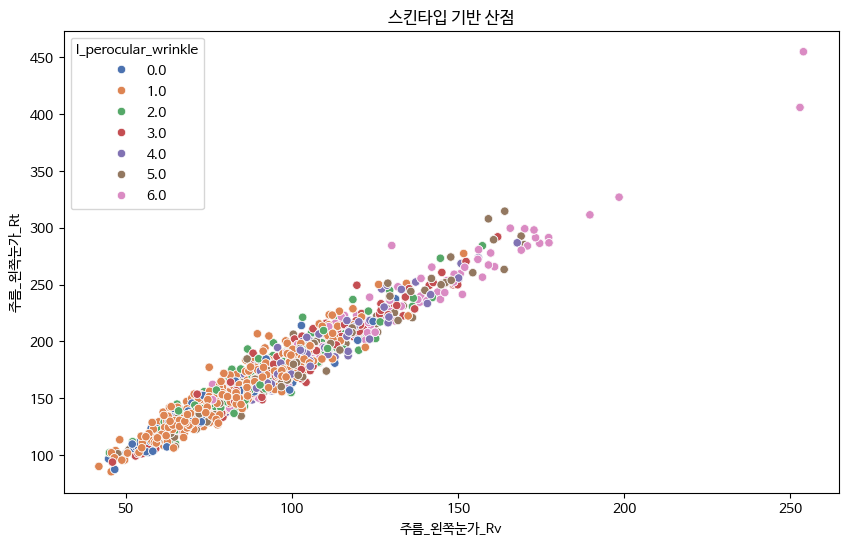

In [ ]:
# 얼굴 피부타입에 따른 군집 분석 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=l_perocular, x='주름_왼쪽눈가_Rv', y='주름_왼쪽눈가_Rt', hue='l_perocular_wrinkle', palette='deep')
plt.title('스킨타입 기반 산점')
plt.show()

회귀분석

In [ ]:
l_perocular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2895 non-null   int64  
 1   l_perocular_wrinkle  2895 non-null   float64
 2   주름_왼쪽눈가_Ra           2895 non-null   float64
 3   주름_왼쪽눈가_Rq           2895 non-null   float64
 4   주름_왼쪽눈가_Rmax         2895 non-null   float64
 5   주름_왼쪽눈가_R3z          2895 non-null   float64
 6   주름_왼쪽눈가_Rt           2895 non-null   float64
 7   주름_왼쪽눈가_Rz=Rtm       2895 non-null   float64
 8   주름_왼쪽눈가_Rp           2895 non-null   float64
 9   주름_왼쪽눈가_Rv           2895 non-null   float64
 10  pc1                  2895 non-null   float64
 11  pc2                  2895 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 271.5 KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 준비
X = l_perocular[['주름_왼쪽눈가_Ra', '주름_왼쪽눈가_Rq', '주름_왼쪽눈가_Rmax',
                 '주름_왼쪽눈가_R3z', '주름_왼쪽눈가_Rt', '주름_왼쪽눈가_Rz=Rtm',
                 '주름_왼쪽눈가_Rp', '주름_왼쪽눈가_Rv']]
y = l_perocular['l_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1930 - loss: 1.9277 - val_accuracy: 0.3642 - val_loss: 1.7761
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3424 - loss: 1.7616 - val_accuracy: 0.3772 - val_loss: 1.7087
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3768 - loss: 1.7085 - val_accuracy: 0.3750 - val_loss: 1.6852
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3849 - loss: 1.6501 - val_accuracy: 0.3750 - val_loss: 1.6618
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3795 - loss: 1.6253 - val_accuracy: 0.3750 - val_loss: 1.6500
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3840 - loss: 1.6386 - val_accuracy: 0.3772 - val_loss: 1.6473
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3897 - loss: 1.6029 - val_accuracy: 0.3793 - val_loss: 1.6513
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3979 - loss: 1.5949 - val_accuracy: 0.3750 - val_loss: 1.6451
Epo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.41796200345423146
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.48      0.91      0.63       197
         2.0       0.00      0.00      0.00        76
         3.0       0.27      0.24      0.25        89
         4.0       0.38      0.05      0.09        61
         5.0       0.25      0.16      0.20        55
         6.0       0.41      0.54      0.46        54

    accuracy                           0.42       579
   macro avg       0.25      0.27      0.23       579
weighted avg       0.31      0.42      0.32       579



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9585492227979274
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        47
         1.0       0.94      0.95      0.95       197
         2.0       1.00      0.96      0.98        76
         3.0       0.97      1.00      0.98        89
         4.0       1.00      0.95      0.97        61
         5.0       0.94      0.89      0.92        55
         6.0       0.95      1.00      0.97        54

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9637305699481865
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.95      0.97      0.96       197
         2.0       0.96      1.00      0.98        76
         3.0       1.00      0.97      0.98        89
         4.0       1.00      0.95      0.97        61
         5.0       0.89      0.89      0.89        55
         6.0       0.95      1.00      0.97        54

    accuracy                           0.96       579
   macro avg       0.97      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.385146804835924
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.38      0.98      0.55       197
         2.0       0.00      0.00      0.00        76
         3.0       0.45      0.06      0.10        89
         4.0       0.00      0.00      0.00        61
         5.0       0.00      0.00      0.00        55
         6.0       0.39      0.46      0.42        54

    accuracy                           0.39       579
   macro avg       0.18      0.21      0.15       579
weighted avg       0.24      0.39      0.24       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'주름_왼쪽눈가_Rmax','주름_왼쪽눈가_Rt'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = l_perocular[['주름_왼쪽눈가_Rmax','주름_왼쪽눈가_Rt']]
y = l_perocular['l_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2164 - loss: 1.9185 - val_accuracy: 0.3707 - val_loss: 1.7478
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3824 - loss: 1.7210 - val_accuracy: 0.3728 - val_loss: 1.7048
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4069 - loss: 1.6599 - val_accuracy: 0.3750 - val_loss: 1.6888
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3826 - loss: 1.6539 - val_accuracy: 0.3707 - val_loss: 1.6793
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3952 - loss: 1.6231 - val_accuracy: 0.3793 - val_loss: 1.6849
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3995 - loss: 1.6139 - val_accuracy: 0.3772 - val_loss: 1.6784
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3963 - loss: 1.6012 - val_accuracy: 0.3685 - val_loss: 1.6795
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3885 - loss: 1.6039 - val_accuracy: 0.3772 - val_loss: 1.6651
Epo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.3747841105354059
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.41      0.95      0.58       197
         2.0       0.00      0.00      0.00        76
         3.0       0.17      0.07      0.10        89
         4.0       0.00      0.00      0.00        61
         5.0       0.07      0.02      0.03        55
         6.0       0.29      0.41      0.34        54

    accuracy                           0.37       579
   macro avg       0.14      0.21      0.15       579
weighted avg       0.20      0.37      0.25       579



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9689119170984456
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.94      0.98      0.96       197
         2.0       1.00      1.00      1.00        76
         3.0       1.00      0.97      0.98        89
         4.0       0.95      0.95      0.95        61
         5.0       0.94      0.89      0.92        55
         6.0       1.00      1.00      1.00        54

    accuracy                           0.97       579
   macro avg       0.98      0.96      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9689119170984456
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.94      0.98      0.96       197
         2.0       1.00      1.00      1.00        76
         3.0       0.97      0.97      0.97        89
         4.0       1.00      0.95      0.97        61
         5.0       0.94      0.89      0.92        55
         6.0       1.00      1.00      1.00        54

    accuracy                           0.97       579
   macro avg       0.98      0.96      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.3609671848013817
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.38      0.92      0.54       197
         2.0       0.00      0.00      0.00        76
         3.0       0.19      0.06      0.09        89
         4.0       0.00      0.00      0.00        61
         5.0       0.00      0.00      0.00        55
         6.0       0.31      0.43      0.36        54

    accuracy                           0.36       579
   macro avg       0.12      0.20      0.14       579
weighted avg       0.19      0.36      0.23       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'주름_왼쪽눈가_Rmax','주름_왼쪽눈가_Rt','주름_왼쪽눈가_Rv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = l_perocular[['주름_왼쪽눈가_Rmax','주름_왼쪽눈가_Rt','주름_왼쪽눈가_Rv']]
y = l_perocular['l_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2933 - loss: 1.8775 - val_accuracy: 0.3707 - val_loss: 1.7235
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3930 - loss: 1.7164 - val_accuracy: 0.3858 - val_loss: 1.6902
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3862 - loss: 1.6667 - val_accuracy: 0.3728 - val_loss: 1.6617
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3680 - loss: 1.6697 - val_accuracy: 0.3879 - val_loss: 1.6482
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3893 - loss: 1.6125 - val_accuracy: 0.3707 - val_loss: 1.6555
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3822 - loss: 1.6129 - val_accuracy: 0.3772 - val_loss: 1.6509
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3963 - loss: 1.6103 - val_accuracy: 0.3793 - val_loss: 1.6464
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3793 - loss: 1.6201 - val_accuracy: 0.3901 - val_loss: 1.6469
Epo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.3747841105354059
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.43      0.92      0.58       197
         2.0       0.00      0.00      0.00        76
         3.0       0.12      0.06      0.08        89
         4.0       0.00      0.00      0.00        61
         5.0       0.19      0.09      0.12        55
         6.0       0.31      0.48      0.38        54

    accuracy                           0.37       579
   macro avg       0.15      0.22      0.17       579
weighted avg       0.21      0.37      0.26       579



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9689119170984456
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        47
         1.0       0.98      0.95      0.97       197
         2.0       0.96      1.00      0.98        76
         3.0       0.97      1.00      0.98        89
         4.0       0.91      1.00      0.95        61
         5.0       1.00      0.89      0.94        55
         6.0       1.00      1.00      1.00        54

    accuracy                           0.97       579
   macro avg       0.97      0.97      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9740932642487047
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.96      0.98      0.97       197
         2.0       1.00      1.00      1.00        76
         3.0       0.97      0.97      0.97        89
         4.0       1.00      1.00      1.00        61
         5.0       0.94      0.89      0.92        55
         6.0       1.00      1.00      1.00        54

    accuracy                           0.97       579
   macro avg       0.98      0.97      0.97       579
weighted avg       0.97      0.97      0.97       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.3765112262521589
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.38      0.96      0.55       197
         2.0       0.00      0.00      0.00        76
         3.0       0.38      0.03      0.06        89
         4.0       0.00      0.00      0.00        61
         5.0       0.00      0.00      0.00        55
         6.0       0.33      0.46      0.38        54

    accuracy                           0.38       579
   macro avg       0.16      0.21      0.14       579
weighted avg       0.22      0.38      0.23       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


독립변수 : pc1, pc2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 준비
X = l_perocular[['pc1','pc2']]
y = l_perocular['l_perocular_wrinkle']

# 데이터셋 분할 (80% 훈련, 20% 검증)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# y 값을 One-Hot Encoding
y_train_categorical = to_categorical(y_train, num_classes=7)  # 0~6등급이므로 7개의 클래스
y_test_categorical = to_categorical(y_test, num_classes=7)

# 딥러닝 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# 두 번째 은닉층
model.add(Dense(32, activation='relu'))

# 출력층 (7개의 클래스에 대한 확률 분포를 출력)
model.add(Dense(7, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# 예측
y_pred = model.predict(X_test_scaled)

# 예측 결과를 원래 등급으로 변환
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# 정확도 평가
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f"딥러닝 - Accuracy: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1802 - loss: 1.9329 - val_accuracy: 0.3858 - val_loss: 1.7212
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3708 - loss: 1.7020 - val_accuracy: 0.3858 - val_loss: 1.6820
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3780 - loss: 1.6593 - val_accuracy: 0.3750 - val_loss: 1.6672
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3754 - loss: 1.6524 - val_accuracy: 0.3772 - val_loss: 1.6587
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3831 - loss: 1.6280 - val_accuracy: 0.3707 - val_loss: 1.6518
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3959 - loss: 1.5951 - val_accuracy: 0.3836 - val_loss: 1.6523
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4103 - loss: 1.5877 - val_accuracy: 0.3815 - val_loss: 1.6548
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.6086 - val_accuracy: 0.3858 - val_loss: 1.6434
Epo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 모델 학습
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
# 예측
y_pred_logistic = logistic_model.predict(X_test)

# 평가
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"로지스틱회귀-Accuracy: {accuracy_logistic}")
print(classification_report(y_test, y_pred_logistic))


로지스틱회귀-Accuracy: 0.38341968911917096
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.41      0.96      0.57       197
         2.0       0.00      0.00      0.00        76
         3.0       0.18      0.03      0.06        89
         4.0       0.00      0.00      0.00        61
         5.0       0.14      0.04      0.06        55
         6.0       0.33      0.52      0.40        54

    accuracy                           0.38       579
   macro avg       0.15      0.22      0.16       579
weighted avg       0.21      0.38      0.25       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 모델 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 예측
y_pred_tree = tree_model.predict(X_test)

# 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"결정 트리 분류- Accuracy: {accuracy_tree}")
print(classification_report(y_test, y_pred_tree))


결정 트리 분류- Accuracy: 0.9533678756476683
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.98      0.95      0.97       197
         2.0       0.96      0.96      0.96        76
         3.0       0.91      0.97      0.93        89
         4.0       1.00      0.95      0.97        61
         5.0       0.89      0.89      0.89        55
         6.0       0.90      1.00      0.95        54

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.96      0.95      0.95       579



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# 예측
y_pred_forest = forest_model.predict(X_test)

# 평가
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"랜덤포레스트 - Accuracy: {accuracy_forest}")
print(classification_report(y_test, y_pred_forest))


랜덤포레스트 - Accuracy: 0.9637305699481865
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        47
         1.0       0.97      0.95      0.96       197
         2.0       1.00      0.96      0.98        76
         3.0       0.91      1.00      0.95        89
         4.0       1.00      1.00      1.00        61
         5.0       0.94      0.89      0.92        55
         6.0       0.95      1.00      0.97        54

    accuracy                           0.96       579
   macro avg       0.97      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



In [ ]:
from sklearn.svm import SVC

# 모델 학습
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 예측
y_pred_svm = svm_model.predict(X_test)

# 평가
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"서포트 벡터 머신 - Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


서포트 벡터 머신 - Accuracy: 0.3747841105354059
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.39      0.95      0.55       197
         2.0       0.00      0.00      0.00        76
         3.0       0.18      0.02      0.04        89
         4.0       0.00      0.00      0.00        61
         5.0       0.00      0.00      0.00        55
         6.0       0.31      0.50      0.39        54

    accuracy                           0.37       579
   macro avg       0.13      0.21      0.14       579
weighted avg       0.19      0.37      0.23       579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
